# Exam 3
## 64090500407 นายวรินทร สิทธิสินธุ์
## 64090500421 นายวัชรพล ตรีสัตยสกุล
## 64090500441 นายพงศ์โพยม  มนพลับ
## 64090500451 นายสิรภัทร  นิลประเสริฐ

## ข้อ 1

### 1.1

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('../data/marketing.csv')
df.head()

,ID,BirthYear,Education,Marital_Status,Income,NKids,EnrollDate,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,AmtGold,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDiscPurchases,AccCampaign,Response
0,1,1985,Graduation,Married,70951.0,0,4/5/2013,66,0,10,554,254,87,54,3,4,9,1,None,No
1,2,1961,Graduation,Single,57091.0,0,15/6/2014,0,0,5,64,7,0,37,7,3,7,1,Second,Yes
2,3,1975,Master,Single,46098.0,2,18/8/2012,86,0,0,27,0,0,36,3,2,2,4,None,No
3,4,1947,PhD,Widow,25358.0,1,22/7/2013,57,0,0,5,0,0,8,1,0,3,2,None,No
4,5,1971,PhD,Married,60491.0,1,6/9/2013,81,0,47,237,12,19,76,6,11,7,4,None,No


In [40]:
#check ว่ามี null หรือปล่าว
df.isnull().sum()

ID                      0
BirthYear               0
Education               0
Marital_Status          0
Income                 24
NKids                   0
EnrollDate              0
Recency                 0
Complain                0
AmtFruits               0
AmtMeats                0
AmtFish                 0
AmtSweets               0
AmtGold                 0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumDiscPurchases        0
AccCampaign             0
Response                0
dtype: int64

In [41]:
#ลบข้อมูลที่เป็น outlier ซึ่งมีคนนึงรายได้ 666,666
indexAge = df[df['Income'] > 300000].index
df.drop(indexAge , inplace=True)

In [42]:
#เติมข้อมูลที่เป็น null
df['Income'] = df['Income'].fillna(df['Income'].mean())
#เปลี่ยนข้อมูลจากปีให้เป็นระยะเวลาแทน
df['EnrollDate'] = pd.to_datetime(df['EnrollDate']).dt.year
df['BirthYear'] = 2022 - df["BirthYear"]
df['EnrollDate'] = 2022 - df["EnrollDate"]

In [43]:
df = df.rename(columns={"BirthYear": "Age", "EnrollDate": "Enrollyear"})

In [44]:
#column ที่เป็นตัวหนังสือ
col = ['Education','Marital_Status','AccCampaign']

In [45]:
#ทำ one-hot encoding
df = pd.get_dummies(df,prefix = col, columns = col)

In [46]:
#เปลี่ยน Response เป็น 1 เป็น Yes และ 0 เป็น No
df['Response'] = df['Response'].apply(lambda x : 1 if x=='Yes' else 0)
df = df.reset_index().drop(columns=['index'])
df

,ID,Age,Income,NKids,Enrollyear,Recency,Complain,AmtFruits,AmtMeats,AmtFish,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,AccCampaign_Both,AccCampaign_First,AccCampaign_None,AccCampaign_Second
0,1,37,70951.0,0,9,66,0,10,554,254,...,0,1,0,0,0,0,0,0,1,0
1,2,61,57091.0,0,8,0,0,5,64,7,...,0,0,1,0,0,0,0,0,0,1
2,3,47,46098.0,2,10,86,0,0,27,0,...,0,0,1,0,0,0,0,0,1,0
3,4,75,25358.0,1,9,57,0,0,5,0,...,0,0,0,0,1,0,0,0,1,0
4,5,51,60491.0,1,9,81,0,47,237,12,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,2226,31,89891.0,0,9,17,0,22,132,59,...,0,0,0,1,0,0,0,0,1,0
2225,2227,49,3502.0,1,9,56,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2226,2228,56,70713.0,1,10,23,0,114,279,82,...,0,0,0,1,0,0,0,0,1,0
2227,2229,52,19656.0,1,9,94,0,4,9,6,...,0,0,0,1,0,0,0,0,1,0


In [47]:
#แบ่งกลุ่มโดยใช้ Kmeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=99)  
X = df.to_numpy()
kmeans.fit(X)     
y_kmeans = kmeans.predict(X)  

In [48]:
#สร้างตาราง group ใหม่ขึ้นมา
df2 = pd.DataFrame(y_kmeans, columns=['Group'])

In [49]:
#เชื่อมตาราง gruop ใหม่กับของเก่า df
df_new = pd.concat([df, df2],axis = 1)

<font size="3">ใช้ feature เกือบทุกอันและตัดอันที่ไม่สำคัญออก ที่ใช้แบบนี้เพราะกลุ่มเรามองว่าส่วนใหญ่สำคัญเราไม่สามารถแยกออกได้ ให้เป็นหน้าที่ของ k-mean ที่ทำการแบ่งกลุ่มเอง </font>

In [50]:
col = ['Age', 'Income', 'NKids', 'Recency',
       'Complain', 'AmtFruits', 'AmtMeats', 'AmtFish', 'AmtSweets', 'AmtGold',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumDiscPurchases', 'Response', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'AccCampaign_Both',
       'AccCampaign_First', 'AccCampaign_None', 'AccCampaign_Second']

In [51]:
#เช็คจำนวนคนในแต่ละกลุ่ม
for i in range(3):
    print("group ",i,":",len(df_new[df_new['Group']==i]),"คน")


group  0 : 804 คน
group  1 : 685 คน
group  2 : 740 คน


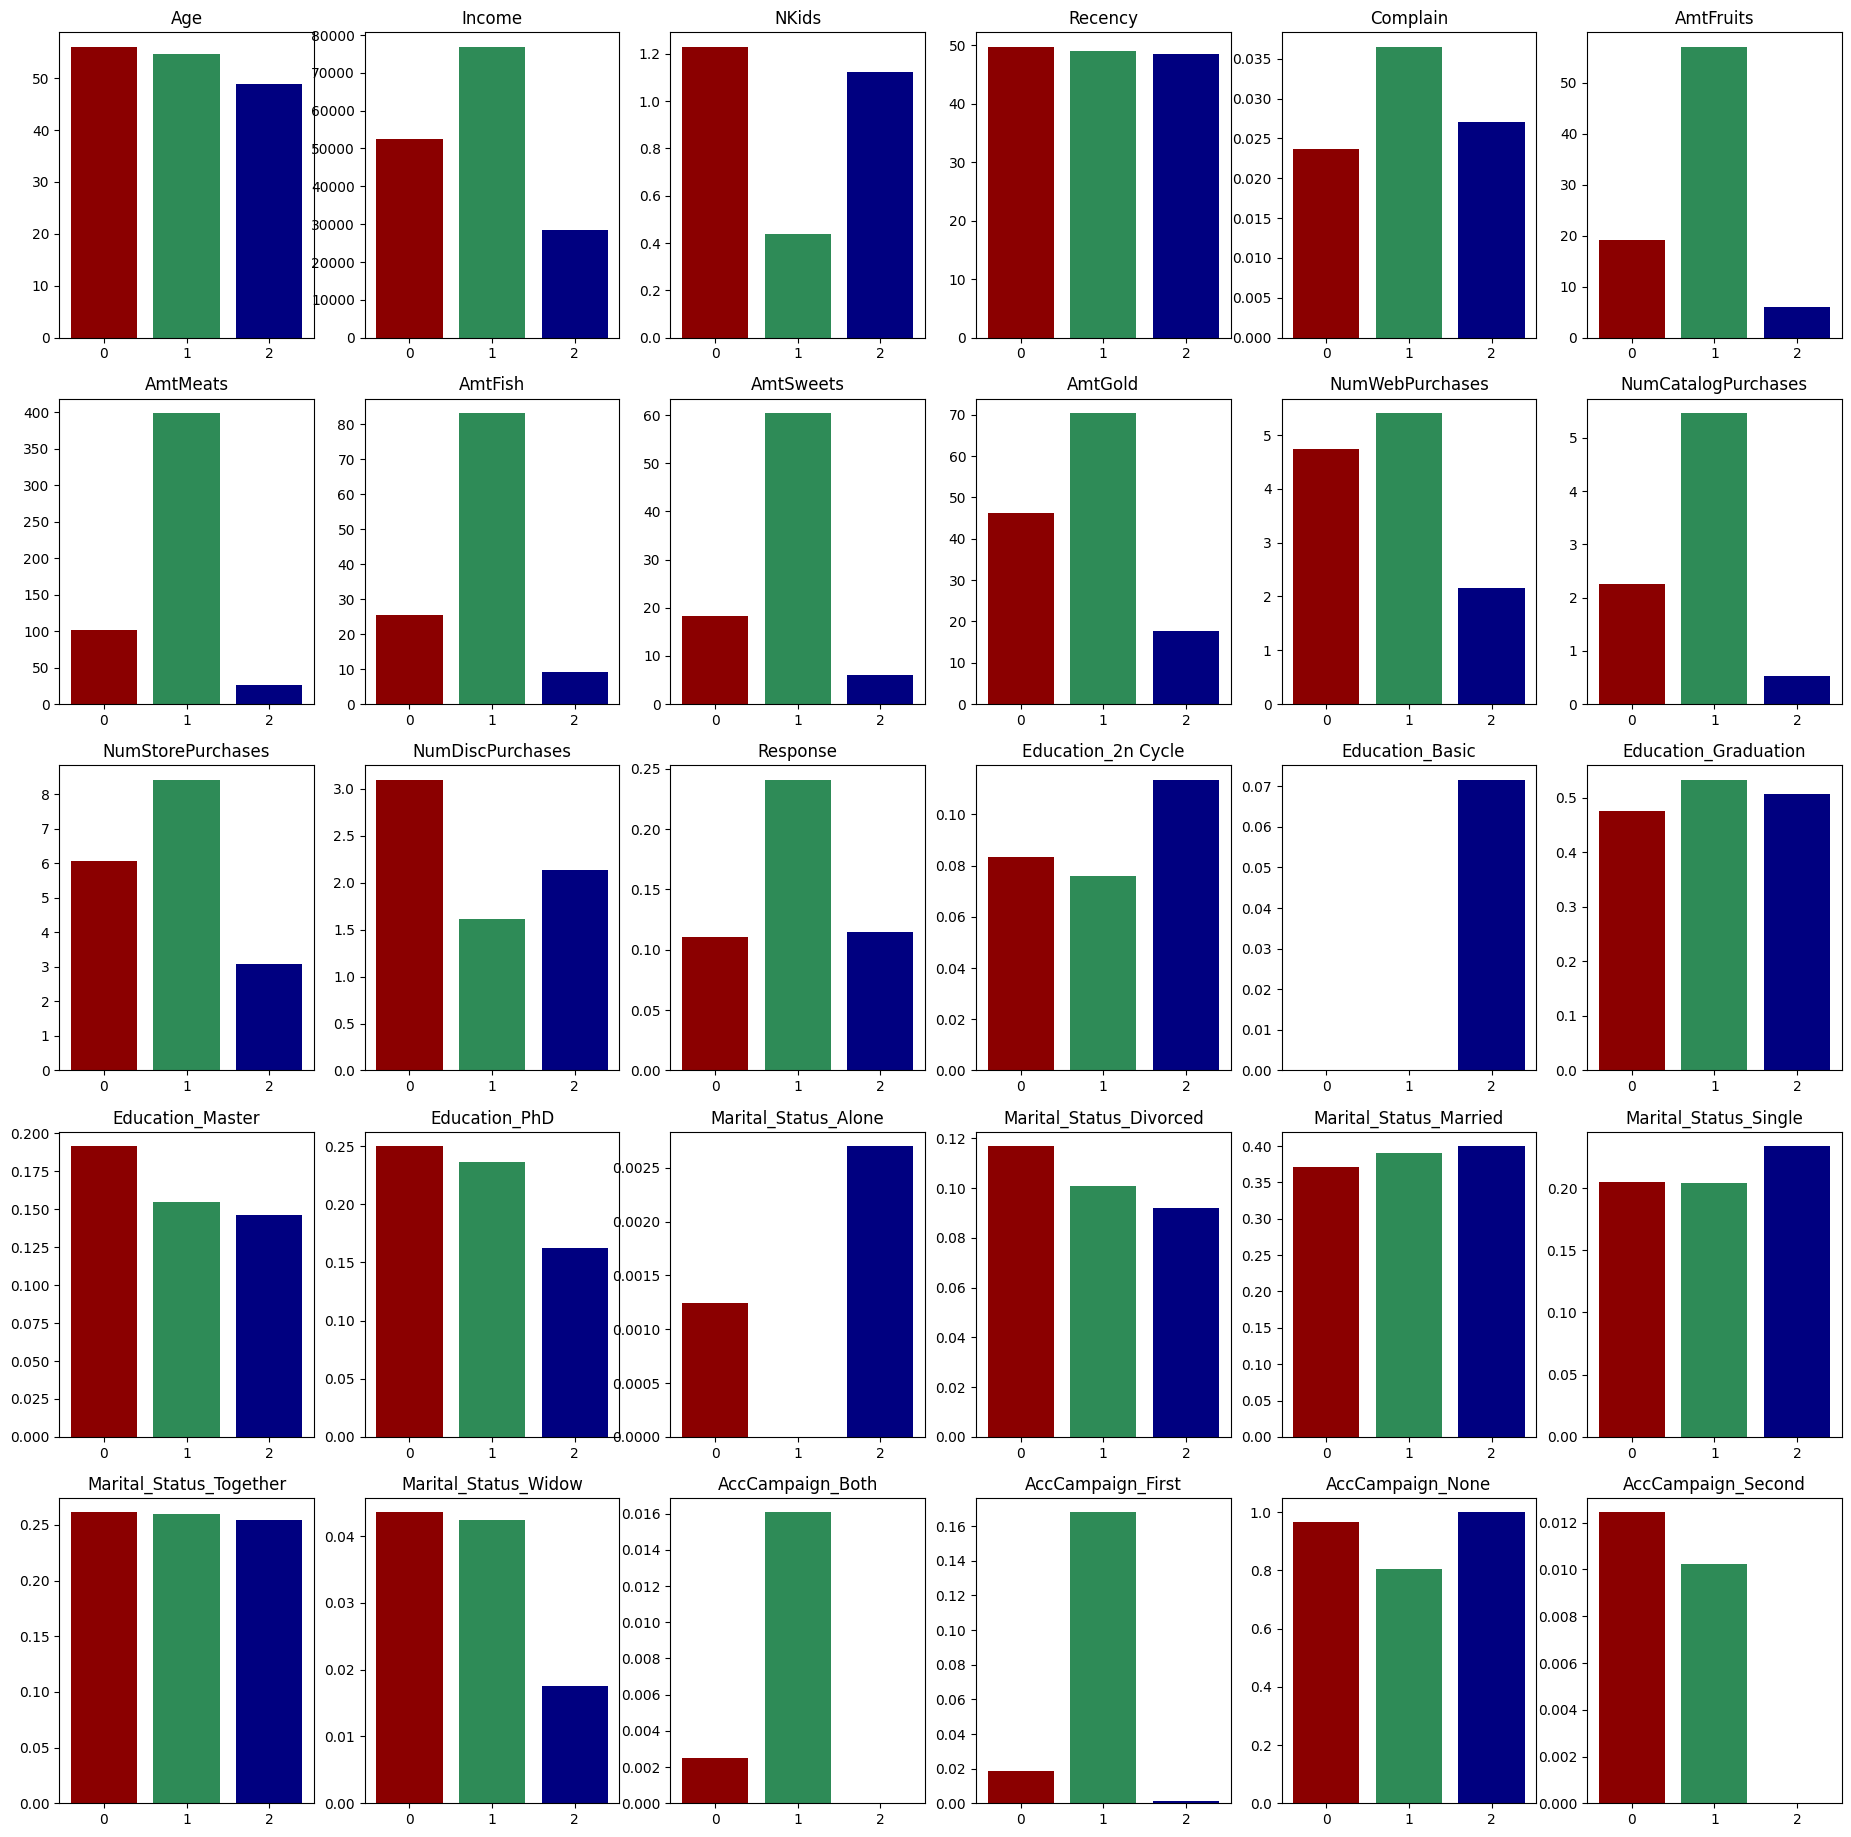

In [52]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 6, figsize=(23,23))
i_=0
j=0
for c in col:
  list_group = []
  for i in range(len(col)):
    list_group+=[df_new[df_new['Group']==i][c].mean()]
  axs[i_, j].bar(np.arange(len(list_group)),list_group,color=['darkred','seagreen','navy'])
  axs[i_, j].set_title(c)
  j+=1
  if j==6:
    j=0
    i_+=1

#พล็อตกราฟโดยการอิงจากหมวดหมู่ต่างๆตามกลุ่มที่แบ่งมา

### จากกราฟเห็นได้ว่า
### Income,Amtทุกอย่าง มีผลอย่างเห็นได้ชัดในการแบ่งกลุ่ม
* โดยGroup 0 เป็นกลุ่มที่มี Income มาก     และอัตราการซื้อ(Amtทุกอย่าง)มากที่สุด และเป็นกลุ่มที่จำนวนคนมากสุด
* โดยGroup 1 เป็นกลุ่มที่มี Income ปานกลาง และอัตราการซื้อ(Amtทุกอย่าง)ปานกลาง  และเป็นกลุ่มที่จำนวนคนต่ำสุด
* โดยGroup 2 เป็นกลุ่มที่มี Income ต่ำ      และอัตราการซื้อ(Amtทุกอย่าง)ต่ำ และเป็นกลุ่มที่จำนวนคนปานกลาง

### ข้อ 1.2

In [53]:
#ดึง df_new จากข้อ 1.1 มาใช้โดยเอากลุ่มที่มากสุด 2 กลุ่ม
df_1_2 = df_new[(df_new['Group']==0) | (df_new['Group']==2)]
df_1_2 = df_1_2.drop(columns=['ID'])
df_1_2

,Age,Income,NKids,Enrollyear,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,AccCampaign_Both,AccCampaign_First,AccCampaign_None,AccCampaign_Second,Group
1,61,57091.0,0,8,0,0,5,64,7,0,...,0,1,0,0,0,0,0,0,1,0
2,47,46098.0,2,10,86,0,0,27,0,0,...,0,1,0,0,0,0,0,1,0,0
3,75,25358.0,1,9,57,0,0,5,0,0,...,0,0,0,1,0,0,0,1,0,2
4,51,60491.0,1,9,81,0,47,237,12,19,...,1,0,0,0,0,0,0,1,0,0
5,57,46891.0,1,9,91,0,12,23,29,15,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,70,57247.0,1,9,50,0,4,32,37,54,...,0,0,1,0,0,0,0,1,0,0
2223,50,51813.0,2,9,37,0,2,7,0,1,...,0,0,0,0,0,0,0,1,0,0
2225,49,3502.0,1,9,56,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,2
2227,52,19656.0,1,9,94,0,4,9,6,8,...,0,0,1,0,0,0,0,1,0,2


In [54]:
#ทำให้ข้อมูลทั้งหมดอยู่ในช่วง 0-1
for c in df_1_2.columns:
    df_1_2[c] = (df_1_2[c]-df_1_2[c].min()) / df_1_2[c].max()

In [55]:
df_1_2.head()

,Age,Income,NKids,Enrollyear,Recency,Complain,AmtFruits,AmtMeats,AmtFish,AmtSweets,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,AccCampaign_Both,AccCampaign_First,AccCampaign_None,AccCampaign_Second,Group
1,0.271318,0.857114,0.000000,0.0,0.000000,0.0,0.025126,0.037101,0.027027,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.162791,0.686917,0.666667,0.2,0.868687,0.0,0.000000,0.015652,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.379845,0.365815,0.333333,0.1,0.575758,0.0,0.000000,0.002899,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.193798,0.909754,0.333333,0.1,0.818182,0.0,0.236181,0.137391,0.046332,0.072243,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.240310,0.699195,0.333333,0.1,0.919192,0.0,0.060302,0.013333,0.111969,0.057034,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
#drop คอลัม Response ที่เอาไว้ทำนาย
X = df.drop(columns=['Response']).to_numpy()
y = df['Response'].to_numpy()

In [57]:
#แบ่ง train_test_split ให้ validation data 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [58]:
#สร้างโมเดล
import tensorflow as tf
tf.random.set_seed(123)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [66]:
#train data
tf.random.set_seed(123)
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

In [67]:
#evaluate test data
results = model.evaluate(X_test, y_test)
print("จากการทดสอบจากข้อมูล validation 20% ของทั้งหมด\nได้ว่า")
print("model นี้มีค่าความแม่นยำ: {:.2f}%".format(results[1]*100))
print("model นี้มีค่า loss: {:.2f}".format(results[0]))

14/14 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8475
จากการทดสอบจากข้อมูล validation 20% ของทั้งหมด
ได้ว่า
model นี้มีค่าความแม่นยำ: 84.75%
model นี้มีค่า loss: 0.40


## ข้อ 2

### 2.1

<font size="3">รถคันนี้น่าจะกินน้ำมันเท่าใด (กี่ไมล์/แกลลอน (MPG)) </font>

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('../data/car-mpg.csv')
df.isnull().sum()

Make          0
DriveTrain    0
EngineSize    0
Cylinders     2
Horsepower    0
MPG           0
Weight        0
Wheelbase     0
Length        0
dtype: int64

In [28]:
#fill null values
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mean())

In [29]:
#ปรับให้เป็น z-score
co = ['EngineSize', 'Cylinders', 'Horsepower', 'Weight', 'Wheelbase', 'Length']
for c in co:
    df[c] = (df[c]-df[c].mean()) / df[c].std()

In [30]:
#ลบcolumn Make ทิ้งเพราะในข้อมูล test ไม่มีบอก
X = df.drop(columns=['MPG','Make'])
y = df['MPG']

In [31]:
#ทำ one-hot encoding
X = pd.get_dummies(X,prefix = ['DriveTrain'], columns = ['DriveTrain'])
X.head()

,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,0.273563,0.123803,0.683703,1.150285,-0.259174,0.183720,1,0,0
1,-1.079501,-1.162545,-0.221136,-1.053980,-0.860727,-1.000290,0,1,0
2,-0.718684,-1.162545,-0.221136,-0.458447,-0.379485,-0.234166,0,1,0
3,0.002951,0.123803,0.753306,-0.003891,-0.018553,-0.025223,0,1,0
4,0.273563,0.123803,0.126879,0.397962,0.823622,0.740901,0,1,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

In [34]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=2500, depth = 9,learning_rate = 0.04627823525262093, loss_function='RMSE', verbose = 500, random_seed = 777)
cat_model.fit(X_train, y_train,eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 5.3328917	test: 4.0241423	best: 4.0241423 (0)	total: 57.7ms	remaining: 2m 24s
500:	learn: 0.3846745	test: 1.1431834	best: 1.1431834 (500)	total: 3.01s	remaining: 12s
1000:	learn: 0.1192010	test: 1.1061383	best: 1.1061284 (992)	total: 7.02s	remaining: 10.5s
1500:	learn: 0.0517035	test: 1.1011955	best: 1.1011955 (1500)	total: 12.7s	remaining: 8.45s
2000:	learn: 0.0248165	test: 1.1002094	best: 1.1000621 (1778)	total: 17.4s	remaining: 4.33s
2499:	learn: 0.0125061	test: 1.0997568	best: 1.0997055 (2461)	total: 21.8s	remaining: 0us

bestTest = 1.099705532
bestIteration = 2461

Shrink model to first 2462 iterations.


In [35]:
#ในเมื่อปรับจูน model จนดีแล้ว จึงใช้ข้อมูลทั้งหมดในการเทรน
cat_model = CatBoostRegressor(iterations=2500, depth=9,learning_rate=0.04627823525262093, loss_function='RMSE', verbose=500 , random_seed = 777)
cat_model.fit(X, y)

0:	learn: 5.0887000	total: 20.5ms	remaining: 51.3s
500:	learn: 0.4311017	total: 4.21s	remaining: 16.8s
1000:	learn: 0.1572416	total: 8.7s	remaining: 13s
1500:	learn: 0.0842672	total: 13.6s	remaining: 9.07s
2000:	learn: 0.0538282	total: 15.3s	remaining: 3.82s
2499:	learn: 0.0413316	total: 19.1s	remaining: 0us


Preprocessing ข้อมูล test ก่อนทำการ predict

In [36]:
# Preprocessing ข้อมูล test ก่อนทำการ predict
df = pd.read_csv('../data/car-mpg.csv')
df['Cylinders']=df['Cylinders'].fillna(df['Cylinders'].mean())
X_pred = [2.8,4.,150.,2500.,108.,172.,0.,1.,0.]
i=0
for c in co:
    X_pred[i] = (X_pred[i]-df[c].mean()) / df[c].std() #z-score
    i+=1
X_pred=np.array(X_pred)
X_pred

array([-0.35786655, -1.16254501, -0.91716528, -1.4202597 , -0.01855258,
       -1.00028961,  0.        ,  1.        ,  0.        ])

In [37]:
# predict 
y_pred = cat_model.predict([X_pred])

<font size="4">คำตอบ</font>

In [38]:
#ans
print("รถคันนี้กินน้ำมันประมาณ {:.2f} MPG".format(y_pred[0]))

รถคันนี้กินน้ำมันประมาณ 25.79 MPG


### 2.2

<font size="3">วิเคราะห์ผลที่ได้รวมถึงน้ำหนักของแต่ละปัจจัย</font>

In [39]:
#ดึงน้ำหนักแต่ละ feature ที่มีผลต่อคำตอบ
importance = cat_model.feature_importances_
importance

array([18.61549188,  5.67082254, 29.71636349, 20.76737423,  7.26174909,
        8.82294591,  1.39412489,  5.0215862 ,  2.72954176])

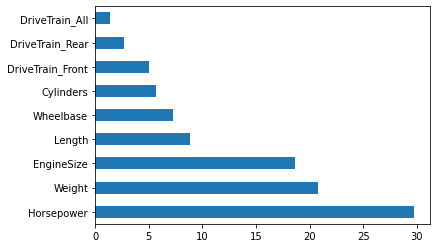

In [40]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(importance, index=['EngineSize', 'Cylinders', 'Horsepower', 'Weight', 'Wheelbase', 'Length','DriveTrain_All','DriveTrain_Front','DriveTrain_Rear'])

feature_importances.nlargest(10).plot(kind='barh')

plt.show()

<font size="3">จากกราฟพบว่า Horusepower มีน้ำหนักมากสุด ตามมาด้วย weight, Enginesize ตามลำดับ</font>

## ข้อ 3

<font size="4">หาความสัมพันธ์ทางคณิตศาสตร์<font/>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('../data/data3.csv')
df.tail()

,x,y
115,160,-51254.19264
116,162,-51706.61594
117,164,-53790.28012
118,166,-54276.33110
119,168,-54116.30938


In [43]:
X = df['x'].to_numpy()
y = df['y'].to_numpy()

<font size="3">สร้างกราฟเพื่อวิเคราะห์ความแม่นยำของ สมการที่ได้ โดยทดลองตั้งค่า degree ต่างกันเรื่อยๆ<font/>

In [44]:
def polyregress(xdata,ydata,degree):
  return np.polynomial.polynomial.polyfit(xdata,ydata,degree) #สร้างฟังชันก์เพื่อสร้างสมการขึ้นมา
poly_x = polyregress(X,y,4) #โดยจะลองเปลี่ยนdegreeเรื่อยๆ เพื่อหาdegreeที่เหมาะสม
poly_x


array([ 1.19513542e+03, -3.62201023e+00,  2.71158346e-01, -3.08421434e-02,
        1.04212187e-04])

<font size="4">ได้สมการว่า <font/>
<font size="3">y = 0.000104X^3 + 0.271X^2 + -3.622X^1 + 119.513   <font/>

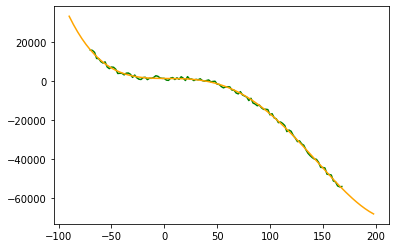

In [45]:
#สร้างกราฟเพื่อเปรียบเทียบระหว่างค่าจริงกับสมการที่สร้างขึ้น
ans_arr=[]
for a in range(-90,200,2):
    ans=0
    for j in range(len(poly_x)):
        ans += poly_x[j]*a**j
    ans_arr+=[ans]
x_pred = np.arange(-90,200,2)
df = pd.read_csv('./data/data3.csv')
x = df['x']
y = df['y']
plt.plot(x,y,color='green')
plt.plot(x_pred,ans_arr,color='orange')

<font size="4">พบว่า <font/>
<font size="3">y = 0.000104X^3 + 0.271X^2 + -3.622X^1 + 119.513  (คำตอบ) <font/>

<font size="3">การใช้degree=4 ทำให้สมการที่ได้ไม่ overfit กับdataจนเกินไป<font/>

<font size="4">ทำนายเมื่อ x=170<font/>

In [46]:
#สร้าง data train จากสมการเพื่อเป็นการลด noise จากข้อมูลที่ได้
ans_arr=[]
for a in range(-70,170,1):
    ans=0
    for j in range(len(poly_x)):
        ans += poly_x[j]*a**j
    ans_arr+=[ans]

In [47]:
X = np.arange(-70,170)
y = np.array(ans_arr)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

In [50]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(iterations=1500, depth=9,learning_rate=0.04627823525262093, loss_function='RMSE', verbose=500)
cat_model.fit(X_train, y_train,eval_set=(X_test, y_test))

0:	learn: 17030.2746079	test: 19037.6941443	best: 19037.6941443 (0)	total: 6.22ms	remaining: 9.33s
500:	learn: 146.3443352	test: 344.7809282	best: 344.6644336 (499)	total: 1.09s	remaining: 2.17s
1000:	learn: 73.9084083	test: 354.1301984	best: 344.6191615 (506)	total: 2.13s	remaining: 1.06s
1499:	learn: 46.0471271	test: 365.5396848	best: 344.6191615 (506)	total: 3s	remaining: 0us

bestTest = 344.6191615
bestIteration = 506

Shrink model to first 507 iterations.


<font size="3">ค่า y เมื่อ x = 170 (คำตอบ)<font/>

In [51]:
y_pred = cat_model.predict([170.])
print("เมื่อ x = 170 ค่า y จะเท่ากับ",y_pred)

เมื่อ x = 170 ค่า y จะเท่ากับ -55456.474412783056


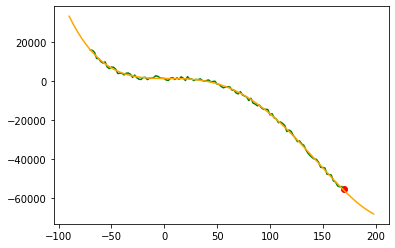

In [52]:
#เมื่อนำไปเปรียบเทียบกับ data ที่ให้มา
ans_arr=[]
for a in range(-90,200,2):
    ans=0
    for j in range(len(poly_x)):
        ans += poly_x[j]*a**j
    ans_arr+=[ans]
x_pred = np.arange(-90,200,2)
df = pd.read_csv('../data/data3.csv')
x = df['x']
y = df['y']
plt.plot(x,y,color='green')
plt.plot(x_pred,ans_arr,color='orange')
plt.scatter(170.,y_pred,c='r')